# Assignment 07

## Section 1

In [1]:
# <1> 
# Import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Section 2

In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

os.getcwd()

'/Users/masoud'

## Section 3

In [4]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

path='/Users/masoud/Documents/CollegeScorecard_Raw_Data/'
file_names=os.listdir(path)
file_names

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 '.DS_Store',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'Crosswalks.zip',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'data.yaml',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv']

## Section 4

In [20]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

cleansed_file_names=[k for k in file_names if k.find('MERGED') != -1]
cleansed_file_names

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv']

## Section 5

In [38]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

# The following function extracts the year of each file from its name.
def Extract_Year(x):
    b=x.find('_')
    y=int(x[:b].replace('MERGED',''))
    return y

cols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]
df=[]

for k in cleansed_file_names:
    year=Extract_Year(k)
    Dframe=pd.read_csv(path+k, usecols=cols)
    Dframe['Year']=year
    df.append(Dframe)

In [45]:
Final_df=pd.concat(df)

## Section 6

In [65]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

print(Final_df.shape)

print(Final_df.columns)

(163331, 7)
Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'Year'],
      dtype='object')


In [66]:
Final_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
0,100654,Alabama A & M University,AL,5.0,0.5010,6828.0,2011
1,100663,University of Alabama at Birmingham,AL,5.0,0.7223,6264.0,2011
2,100690,Amridge University,AL,5.0,NaN,8720.0,2011
3,100706,University of Alabama in Huntsville,AL,5.0,0.6368,8094.0,2011
4,100724,Alabama State University,AL,5.0,0.5080,8082.0,2011


In [53]:
Final_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
7465,45896402,Strayer University-Charleston Campus,SC,5.0,NaN,14085.0,2010
7466,45897301,Strayer University-Irving,TX,6.0,NaN,14085.0,2010
7467,45897302,Strayer University-Katy,TX,6.0,NaN,14085.0,2010
7468,45897303,Strayer University-Northwest Houston,TX,6.0,NaN,14085.0,2010
7469,45897304,Strayer University-Plano,TX,6.0,NaN,14085.0,2010


In [55]:
Final_df.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
3990,228149,St. Mary's University,TX,6.0,0.6140,22576.0,2010
2675,190600,CUNY John Jay College of Criminal Justice,NY,2.0,0.8158,4279.0,2007
6376,434113,Rogies School of Beauty Culture-Caguas,PR,9.0,NaN,NaN,2001
825,133650,Florida Agricultural and Mechanical University,FL,5.0,0.7075,2852.0,2004
1278,157438,Gateway Community and Technical College,KY,5.0,NaN,4328.0,2018
1110,147396,Morrison Institute of Technology,IL,3.0,NaN,15590.0,2014
1234,145275,Garrett-Evangelical Theological Seminary,IL,3.0,NaN,NaN,2000
6003,447810,Blake Austin College,CA,8.0,NaN,NaN,2013
4586,240745,Guam Community College,GU,9.0,NaN,2100.0,2006
5669,440828,Oregon State University-Cascades Campus,OR,8.0,NaN,NaN,2012


In [67]:
# Finding the first 10 rows of Final-df that have a missing value in the column 'ADM_RATE'. 

Final_df[Final_df['ADM_RATE'].isna()==True][:10]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2,100690,Amridge University,AL,5.0,NaN,8720.0,2011
6,100760,Central Alabama Community College,AL,5.0,NaN,2700.0,2011
7,100812,Athens State University,AL,5.0,NaN,NaN,2011
11,101028,Chattahoochee Valley Community College,AL,5.0,NaN,4140.0,2011
12,101073,Concordia College Alabama,AL,5.0,NaN,8090.0,2011
14,101143,Enterprise State Community College,AL,5.0,NaN,3668.0,2011
15,101161,Coastal Alabama Community College,AL,5.0,NaN,4080.0,2011
17,101240,Gadsden State Community College,AL,5.0,NaN,3780.0,2011
18,101277,New Beginning College of Cosmetology,AL,5.0,NaN,NaN,2011
19,101286,George C Wallace Community College-Dothan,AL,5.0,NaN,3330.0,2011


In [63]:
Final_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,1.633310e+05,163330.000000,44911.000000,79194.000000,163331.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367,2007.249481
std,4.571721e+06,2.189217,0.217062,9985.998016,6.608266
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000,2002.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000,2008.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000,2013.000000
max,4.914640e+07,9.000000,1.000000,74787.000000,2018.000000


## Section 7

In [75]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

UMBC_df=Final_df[Final_df['INSTNM'].str.contains('University of Maryland-Baltimore County')]

## Section 8

In [77]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

UMBC_df.shape

(23, 7)

In [78]:
UMBC_df.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'Year'],
      dtype='object')

In [79]:
UMBC_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003


In [80]:
UMBC_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1629,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
1779,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
1710,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010


In [81]:
UMBC_df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014


In [83]:
# Finding all missing values in the column of 'ADM_RATE' in UMBC dataframe.

UMBC_df[UMBC_df.ADM_RATE.isna()==True]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998


In [85]:
UMBC_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,23.0,23.0,18.000000,19.000000,23.00000
mean,163268.0,2.0,0.640694,9004.842105,2007.00000
std,0.0,0.0,0.052728,1825.795421,6.78233
min,163268.0,2.0,0.568300,5490.000000,1996.00000
25%,163268.0,2.0,0.597600,8270.000000,2001.50000
50%,163268.0,2.0,0.632100,8872.000000,2007.00000
75%,163268.0,2.0,0.689375,10226.000000,2012.50000
max,163268.0,2.0,0.717400,11778.000000,2018.00000


## Section 9

Text(0, 0.5, 'In-state Tuition (USD)')

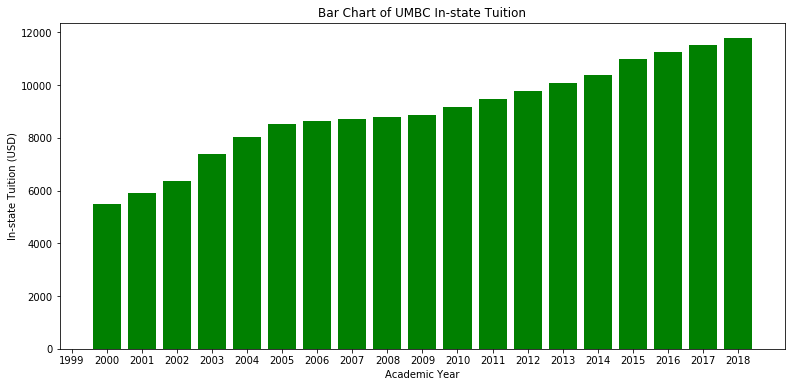

In [119]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

# For convenience, we first sort the rows of UMBC dataframe by year.

UMBC_df=UMBC_df.sort_values(by='Year',ascending=True)

# We transform the 'Year' and 'TUITIONFEE_IN' columns UMBC dataframe into lists.

UMBC_x_list=UMBC_df.Year.apply(str).tolist()
UMBC_y_list=UMBC_df.TUITIONFEE_IN.tolist()

# We now construct the bar chart of UMBC In-state tuition over time. Notice that the first 4 years (1996-1999) are
# not presented in the bar chart as we have a missing (NaN) value for them.

fig, ax = plt.subplots(figsize=(13,6))

ax.bar(UMBC_x_list, UMBC_y_list,color='g')
ax.set_title("Bar Chart of UMBC In-state Tuition")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition (USD)")


## Section 10

Text(0, 0.5, 'In-state Tuition (USD)')

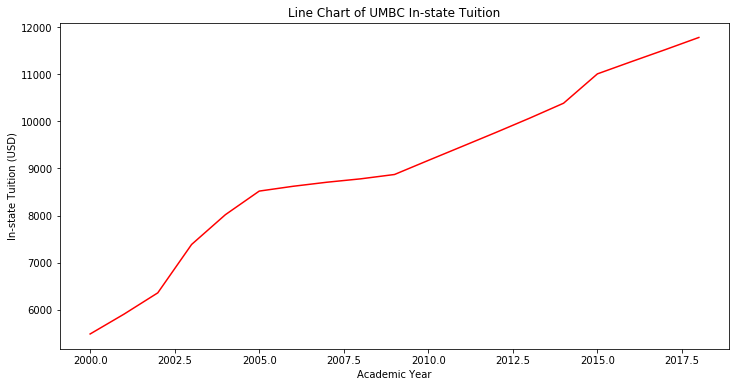

In [109]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(UMBC_df.Year,UMBC_df.TUITIONFEE_IN,color='r')
ax.set_title("Line Chart of UMBC In-state Tuition")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition (USD)")

## Section 11

In [146]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

UMBC_Tuition_list = UMBC_df.TUITIONFEE_IN.tolist()

In [159]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

# Note that the percentage for the very last year cannot be calculated, so we add a nan at the end of the list.

UMBC_tuition_PCT=[round((UMBC_Tuition_list[k+1]-UMBC_Tuition_list[k])*100/UMBC_Tuition_list[k],2) 
                      for k in range(len(UMBC_Tuition_list)-1)] + [np.nan]

print(UMBC_tuition_PCT)

[nan, nan, nan, nan, 7.65, 7.65, 16.13, 8.55, 6.23, 1.2, 1.0, 0.83, 1.05, 3.37, 3.23, 3.14, 3.11, 3.14, 5.99, 2.34, 2.25, 2.26, nan]


In [ ]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

# Already implemented above!

In [161]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

UMBC_df['PCT_CHANGE']=UMBC_tuition_PCT
UMBC_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,7.65


Text(0, 0.5, 'Tuition Growth Rate (%)')

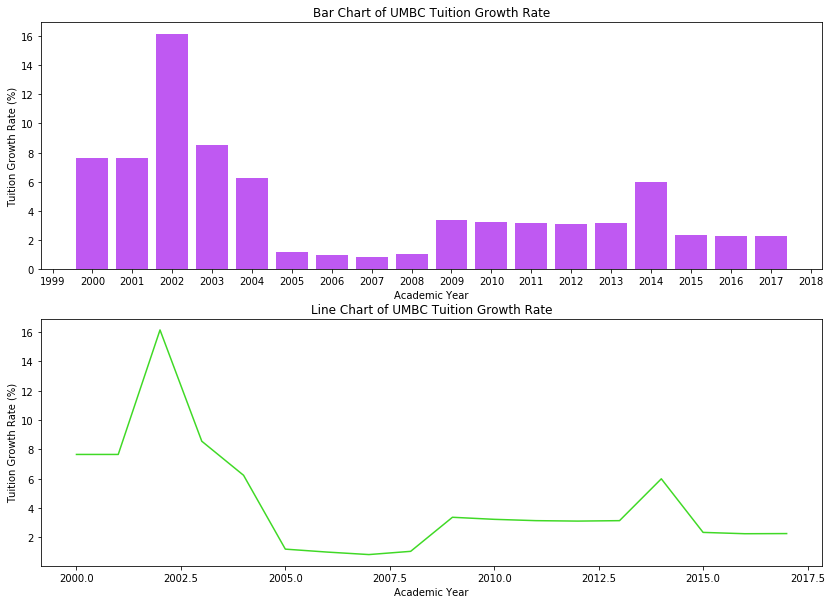

In [166]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

UMBC_x_list=UMBC_df.Year.apply(str).tolist()
UMBC_y_list=UMBC_df.PCT_CHANGE.tolist()

fig, ax_list = plt.subplots(2,1,figsize=(14,10))

ax_list[0].bar(UMBC_x_list,UMBC_y_list,color=(0.75,0.35,0.95))
ax_list[0].set_title("Bar Chart of UMBC Tuition Growth Rate")
ax_list[0].set_xlabel("Academic Year")
ax_list[0].set_ylabel("Tuition Growth Rate (%)")
ax_list[1].plot(UMBC_df.Year,UMBC_df.PCT_CHANGE,color=(0.25,0.85,0.15))
ax_list[1].set_title("Line Chart of UMBC Tuition Growth Rate")
ax_list[1].set_xlabel("Academic Year")
ax_list[1].set_ylabel("Tuition Growth Rate (%)")

Text(0, 0.5, 'Tuition Growth Rate (%)')

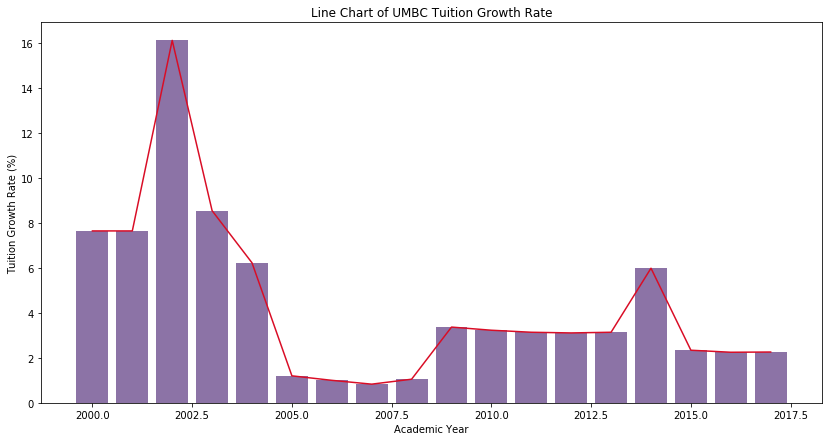

In [237]:
# I was not quite sure how meant by having them in the same plot. Just in case if the plot below is what is asked 
# by the problem.

fig, ax = plt.subplots(figsize=(14,7))

ax.bar(UMBC_df.Year,UMBC_df.PCT_CHANGE,color=(0.55,0.45,0.65))
ax.plot(UMBC_df.Year,UMBC_df.PCT_CHANGE,color=(0.85,0.05,0.15))
ax.set_title("Line Chart of UMBC Tuition Growth Rate")
ax.set_xlabel("Academic Year")
ax.set_ylabel("Tuition Growth Rate (%)")

## Section 12

In [178]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

def PCT_list(tuition):
    outcome=[]
    for k in range(len(tuition)-1):
        aux=round((tuition[k+1]-tuition[k])*100/tuition[k],2)
        outcome.append(aux)
    outcome.append(np.nan)
    return outcome

In [180]:
# Checking that the function works properly. We subtract the results obtained in two ways (i.e. without use of
# the function and with the use of the function) and we get zero wherever we have an entry different from nan. 

print([UMBC_df.PCT_CHANGE.tolist()[k]-PCT_list(UMBC_df.TUITIONFEE_IN.tolist())[k] 
 for k in range(len(UMBC_df.PCT_CHANGE.tolist()))])

[nan, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan]


## Section 13

In [118]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

JHU_df=Final_df[Final_df['INSTNM'].str.contains('Johns Hopkins University')].sort_values(by='Year',ascending=True)
JHU_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1603,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014
1548,162928,Johns Hopkins University,MD,2.0,0.1412,48710.0,2015
1503,162928,Johns Hopkins University,MD,2.0,0.1284,50410.0,2016
1473,162928,Johns Hopkins University,MD,2.0,0.1254,52170.0,2017
1410,162928,Johns Hopkins University,MD,2.0,0.1148,53740.0,2018


## Section 14

Text(0, 0.5, 'In-state Tuition (USD)')

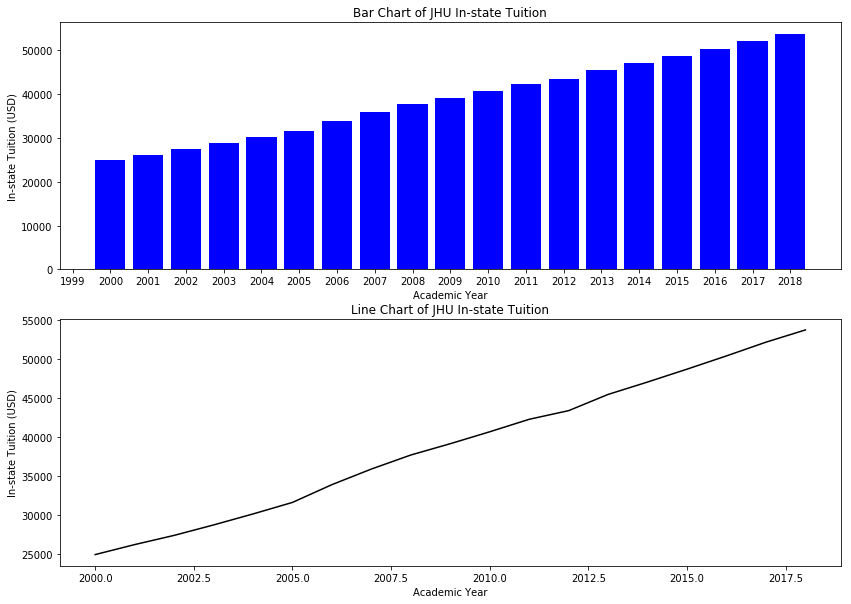

In [140]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

JHU_x_list=JHU_df.Year.apply(str).tolist()
JHU_y_list=JHU_df.TUITIONFEE_IN.tolist()

fig, ax_list = plt.subplots(2,1,figsize=(14,10))

ax_list[0].bar(JHU_x_list,JHU_y_list,color='b')
ax_list[0].set_title("Bar Chart of JHU In-state Tuition")
ax_list[0].set_xlabel("Academic Year")
ax_list[0].set_ylabel("In-state Tuition (USD)")
ax_list[1].plot(JHU_df.Year,JHU_df.TUITIONFEE_IN,color='k')
ax_list[1].set_title("Line Chart of JHU In-state Tuition")
ax_list[1].set_xlabel("Academic Year")
ax_list[1].set_ylabel("In-state Tuition (USD)")

Text(0, 0.5, 'In-state Tuition (USD)')

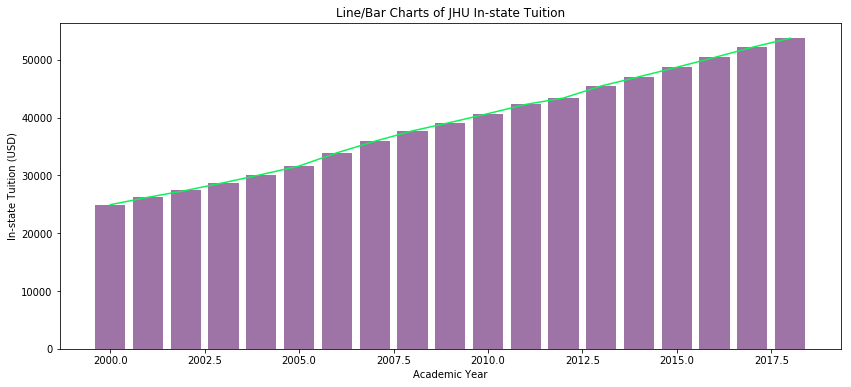

In [253]:
# I was not quite sure how meant by having them in the same plot. Just in case if the plot below is what is asked 
# by the problem.

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(JHU_df.Year,JHU_df.TUITIONFEE_IN,color=(0.62,0.45,0.65))
ax.plot(JHU_df.Year,JHU_df.TUITIONFEE_IN,color=(0.05,0.95,0.35))
ax.set_title("Line/Bar Charts of JHU In-state Tuition")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition (USD)")

## Section 15

In [182]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

print(PCT_list(JHU_df.TUITIONFEE_IN.tolist()))

[nan, nan, nan, nan, 5.13, 4.5, 4.89, 4.91, 4.91, 7.21, 5.9, 5.01, 3.85, 3.91, 3.93, 2.63, 4.79, 3.5, 3.51, 3.49, 3.49, 3.01, nan]


## Section 16

In [185]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

JHU_df['PCT_CHANGE']=PCT_list(JHU_df.TUITIONFEE_IN.tolist())
JHU_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,PCT_CHANGE
1603,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014,3.51
1548,162928,Johns Hopkins University,MD,2.0,0.1412,48710.0,2015,3.49
1503,162928,Johns Hopkins University,MD,2.0,0.1284,50410.0,2016,3.49
1473,162928,Johns Hopkins University,MD,2.0,0.1254,52170.0,2017,3.01
1410,162928,Johns Hopkins University,MD,2.0,0.1148,53740.0,2018,NaN


## Section 17

Text(0, 0.5, 'Tuition Growth Rate (%)')

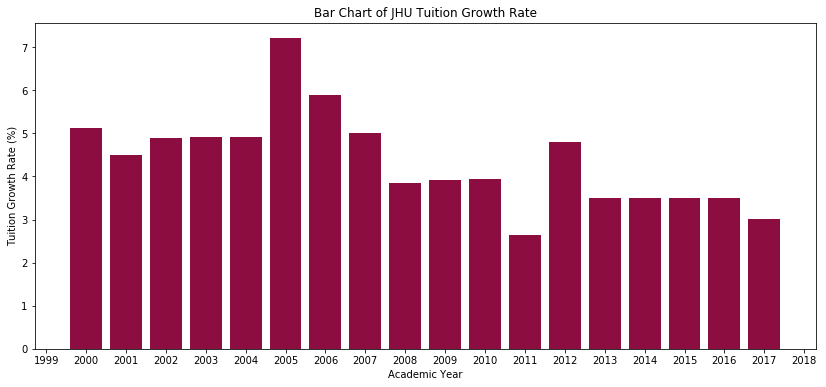

In [212]:
# <17> 
# Make a bar plot of the JHU percentage changes tuitions over time

JHU_x_list=JHU_df.Year.apply(str).tolist()

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(JHU_x_list,JHU_df.PCT_CHANGE,color=(0.55,0.05,0.25))
ax.set_title("Bar Chart of JHU Tuition Growth Rate")
ax.set_xlabel("Academic Year")
ax.set_ylabel("Tuition Growth Rate (%)")

Text(0, 0.5, 'Tuition Growth Rate (%)')

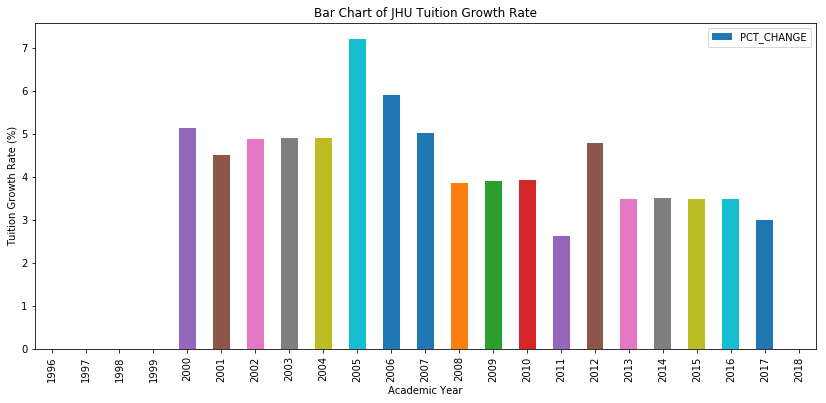

In [231]:
# Doing the same job directly through pandas:

JHU_df.plot.bar('Year','PCT_CHANGE',figsize=(14,6),title="Bar Chart of JHU Tuition Growth Rate")
plt.xlabel("Academic Year")
plt.ylabel("Tuition Growth Rate (%)")

## Section 18

In [198]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

UMBC2_df=UMBC_df[['Year','PCT_CHANGE']]
UMBC2_df.rename(columns={'PCT_CHANGE':'UMBC_PCT'}, inplace=True)
UMBC2_df.tail()

,Year,UMBC_PCT
1610,2014,5.99
1555,2015,2.34
1510,2016,2.25
1478,2017,2.26
1415,2018,NaN


In [201]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

JHU2_df=JHU_df[['Year','PCT_CHANGE']]
JHU2_df.rename(columns={'PCT_CHANGE':'JHU_PCT'}, inplace=True)
JHU2_df.tail()

,Year,JHU_PCT
1603,2014,3.51
1548,2015,3.49
1503,2016,3.49
1473,2017,3.01
1410,2018,NaN


In [203]:
# Now, merger the two data frames
# and display the new dataframe

UMBC_JHU_df=pd.merge(UMBC2_df,JHU2_df,on='Year')
UMBC_JHU_df

,Year,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,7.65,5.13
5,2001,7.65,4.50
6,2002,16.13,4.89
7,2003,8.55,4.91
8,2004,6.23,4.91
9,2005,1.20,7.21


Text(0, 0.5, 'Tuition Growth Rate (%)')

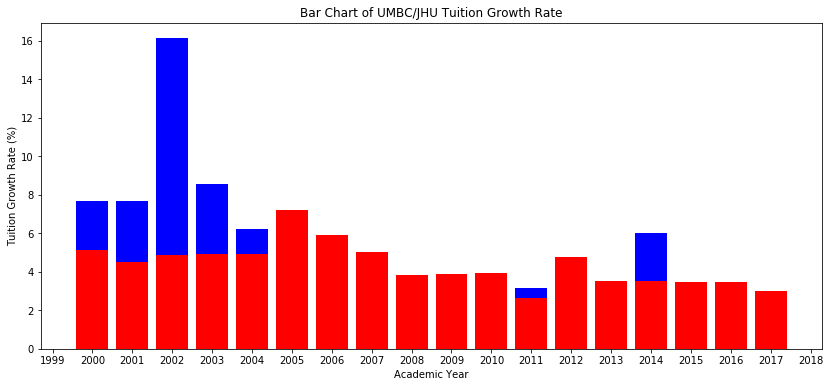

In [218]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

x_list=UMBC_JHU_df.Year.apply(str).tolist()

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(x_list,UMBC_JHU_df.UMBC_PCT,color='b')
ax.bar(x_list,UMBC_JHU_df.JHU_PCT,color='r')
ax.set_title("Bar Chart of UMBC/JHU Tuition Growth Rate")
ax.set_xlabel("Academic Year")
ax.set_ylabel("Tuition Growth Rate (%)")

# As predicted, this does not work!

Text(0, 0.5, 'Rate of Tuition Growth (%)')

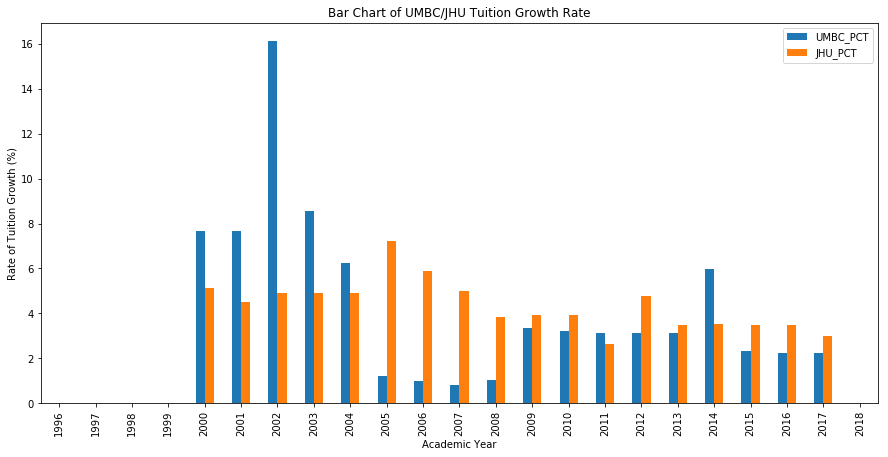

In [228]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

UMBC_JHU_df.plot.bar('Year',y=['UMBC_PCT','JHU_PCT'], figsize=(15,7), 
                     title='Bar Chart of UMBC/JHU Tuition Growth Rate')
plt.xlabel('Academic Year')
plt.ylabel('Rate of Tuition Growth (%)')

Text(0, 0.5, 'Rate of Tuition Growth (%)')

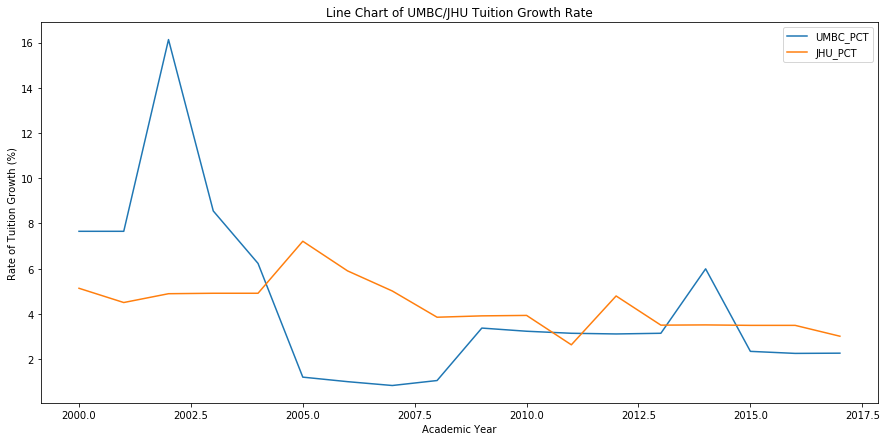

In [229]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

UMBC_JHU_df.plot('Year',y=['UMBC_PCT','JHU_PCT'], figsize=(15,7), 
                     title='Line Chart of UMBC/JHU Tuition Growth Rate')
plt.xlabel('Academic Year')
plt.ylabel('Rate of Tuition Growth (%)')

## Section 19

In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell


The following conclusions can be drawn from the above charts:

  1. Both the bar charts and the line charts of the in-state tuition for both UMBC and JHU show a *steady growth*        over the period 1996-2019. 
  
  
  2. The rate of the in-state tuition growth in the two schools are however different. 
  
     2.1. The rate of growth in in-state tuition at UMBC experiences a steep increase from 2001 to 2002 (16%     incearse). However, through 2002-2005 the rate of growth in UMBC in-state tuition drops by about 15%. Through      2005 to 2007, the rate of the in-state tuition growth at UMBC approximately stays constant. From 2007 to 2009      the rate of the growth at UMBC experiences an increase by about 2%. From 2009 to 2013, the rate of the growth      at UMBC stays constant, and after a slight increase around 2013 and about the same amount decrease in 2015,  
     the rate of the in-state tuition at UMBC has stayed constant up to date.
     
     2.2. The rate of in-state tuition growth at JHU has been roughly a constant till 2004. From 2004 to 2005, the  rate of tuition growth experiences an increase by about 2 percent, but then the rate of the growth decreases by about the same value till 2007. Since 2007, the rate of the in-state tuition growth at JHU has fluctuated by small amounts, but overall the rate of the in-state tuition growth has been more stable than UMBC.  
    
  
  3. Although the rate of the growth in tuition at JHU has been more stable than UMBC, it is worth noticing that the tuitions at JHU are considerably higher than the tuitions at UMBC. For instance, the in-state tuition at UMBC in the year 2018-2019 academic year has been close to 12000 USD. However, the in-state tuition at JHU during the same academic year has exceeded 50000 USD. This means that higher education at JHU during the year 2018-2019 has been 4 times more expensive than higher education at UMBC during the same academic year. 